## Tensorflow Basic

* Define & Run 방식: C, 자바언어 complie이 필요 -Tensorflow 방식 
* Define by run: Python 등 interpreter 언어
* Define graph & excecute Session: 그래프로 정의 세션으로 실행:

In [ ]:
### Graph: Define 된 모든 tensor(Node,숫자등 연산해야하는 객체),Operator(연산자) 

In [3]:
import tensorflow as tf

In [17]:
## Tensor 
tf_string = tf.constant('hello tensorflow')
tf_int = tf.constant(10)
tf_float = tf.constant(3.14)

In [6]:
print(tf_string)
print(tf_int)
print(tf_float)

Tensor("Const_1:0", shape=(), dtype=string)
Tensor("Const_2:0", shape=(), dtype=int32)
Tensor("Const_3:0", shape=(), dtype=float32)


In [10]:
tf_string.name

'Const_1:0'

In [11]:
tf_string.shape


TensorShape([])

In [12]:
tf_string.dtype

tf.string

In [15]:
one = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
two = tf.constant([[2],[2],[2]])

matmul = tf.matmul(one,two)
print(matmul)

Tensor("MatMul:0", shape=(3, 1), dtype=int32)


In [20]:
tf_string = tf.constant('hello tensorflow')
tf_int = tf.constant(10)
tf_float = tf.constant(3.14)

with tf.Session() as sess: 
    _tf_string = sess.run(tf_string)
    _tf_int =sess.run(tf_int)
    _tf_float = sess.run(tf_float)

    print(_tf_string)
    print(_tf_float)
    print(_tf_int)


3.14
10
b'hello tensorflow'


### Constant

In [23]:
const = tf.constant(10)

with tf.Session() as sess:
    print(sess.run(const)) ## 대입연산

10


### Placeholder

In [25]:
data = [1, 2, 3, 4, 5]
pl_data = tf.placeholder(tf.float32)

with tf.Session() as sess:
    print(sess.run(pl_data, {pl_data: data})) ## maping 필요 

[ 1.  2.  3.  4.  5.]


## variable : weight 
* 특징: initializing 필요 

In [27]:
var = tf.Variable(10)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) ## initializing 필요 
    print(sess.run(var)) 

10


## 실습: Linear Regression
* Generating Data
* Building Model
* Training Model
* Implementation


### Training Model 

L(y′,y)=1/2m∑n=1m(y′n−yn)2⋯mean squared error

### 최소값 찾는 방법 →→ Gradient Descent Optimizer

업데이트된 W=이전W−−α*∂L/∂W ( 기존의 Loss 함수를 가중치로 미분 

### Implementation 

In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [174]:
samples = 1000
data = np.array([1e-3*float(i) for i in range(samples)]) ## linear 데이터 만들기 

In [226]:
## 실제 값 만들기 = label 값 ( noise 포함됨)
label = 4.2*data + 2.7 + np.random.randn(samples)*0.1 ## weight*data + bias + noise 
print(label[:10]) 
target = 4.2 *data+ 2.7 ## target linear (noise없는 깔끔한 target )

[ 2.51031948  2.81112355  2.74183371  2.79662962  2.76199183  2.57048762
  2.81603786  2.6413732   2.64938026  2.80844636]


In [227]:
1e-2

0.01

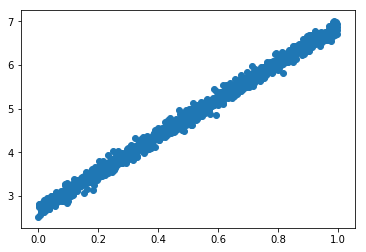

In [228]:
plt.scatter(data, label) ## 실제 값들 feature 값 ,label 값 plot

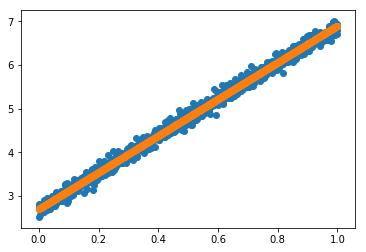

In [229]:
plt.scatter(data,label)
plt.scatter(data,target) ## 목표로 가지는 linear 값 

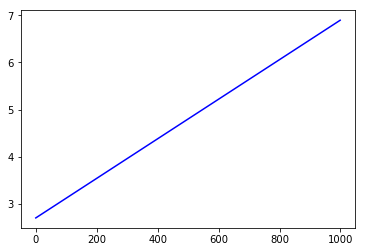

In [230]:
plt.plot(target,'b')

In [231]:
x = tf.placeholder (tf.float32)
y_ = tf.placeholder(tf.float32)
w = tf.Variable(4.) ## 4로 가중치를 주고 이제부터 업데이트 하여 최적의 w값을 찾음 
b = tf.Variable(-4.0) ## prediction model 

In [232]:
y = w*x + b

In [233]:
loss = tf.losses.mean_squared_error(y_,y) ## cost 

In [234]:
train_op= tf.train.GradientDescentOptimizer(1e-2).minimize(loss) 
## optimizer
## step size =1e-2 , loss를 최소화 하기 

In [235]:
init = tf.global_variables_initializer()

In [239]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        _,_loss = sess.run([train_op,loss],{x:data,y_:label}) ## session은 한번만 실행시켜줌 for 문 실행필요
    ## [train_op,loss] 문은 실행할시에 바로 보여줌 안그러면 계속 돌게 되어서 무한번 실행하게됨 
    ## 실행하는 노드에 따라 return 실행
        print(_loss)
    
  ## loss를 최소화 해주는 횟수와 최적의 W를알려줌 

2310.37
242.958
32.2089
10.6682
8.40974
8.11695
8.0251
7.95433
7.88629
7.81914
7.75266
7.68684
7.62166
7.55712
7.4932
7.42991
7.36724
7.30518
7.24372
7.18287
7.12262
7.06295
7.00386
6.94535
6.88741
6.83004
6.77323
6.71697
6.66127
6.6061
6.55148
6.49739
6.44383
6.39079
6.33827
6.28626
6.23476
6.18376
6.13327
6.08326
6.03374
5.98471
5.93616
5.88808
5.84047
5.79333
5.74664
5.70041
5.65463
5.6093
5.56442
5.51997
5.47596
5.43237
5.38921
5.34648
5.30416
5.26226
5.22076
5.17967
5.13898
5.09869
5.05879
5.01928
4.98016
4.94142
4.90306
4.86507
4.82745
4.79021
4.75332
4.7168
4.68063
4.64481
4.60935
4.57423
4.53945
4.50502
4.47092
4.43716
4.40372
4.37061
4.33783
4.30536
4.27321
4.24138
4.20986
4.17864
4.14773
4.11712
4.08681
4.0568
4.02708
3.99765
3.9685
3.93965
3.91107
3.88277
3.85475
3.82701


In [ ]:
  _pred = sess.run(y,{x:data})

step:0, _loss:2310.371337890625
step:10, _loss:7.752664089202881
step:20, _loss:7.122619152069092
step:30, _loss:6.551479339599609
step:40, _loss:6.033743858337402
step:50, _loss:5.564420700073242
step:60, _loss:5.138979434967041
step:70, _loss:4.753320693969727
step:80, _loss:4.403720855712891
step:90, _loss:4.086810111999512


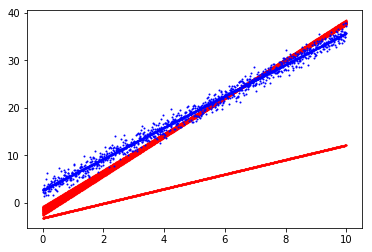

In [242]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        _,_loss = sess.run([train_op,loss],{x:data,y_:label})## mapping 
        ## _ = train_op , _loss = loss를 나타냄 
        if i % 10 ==0:
            _pred = sess.run(y,{x:data})
            plt.scatter(data,_pred,1,'r')
            print('step:{}, _loss:{}'.format(i,_loss))
    
    plt.scatter(data,target,1,'b') ## target 
plt.scatter(data,label,1,'b') ## 점선 

step: 0, loss: 460.16326904296875, w: 2.467766284942627, b: 0.38348445296287537
step: 100, loss: 1.4184025526046753, w: 3.5046160221099854, b: 1.3593024015426636
step: 200, loss: 1.165897011756897, w: 3.430511713027954, b: 1.8494527339935303
step: 300, loss: 1.0712884664535522, w: 3.3851516246795654, b: 2.1494789123535156
step: 400, loss: 1.0358407497406006, w: 3.357386350631714, b: 2.333127498626709
step: 500, loss: 1.0225590467453003, w: 3.340390682220459, b: 2.4455413818359375
step: 600, loss: 1.0175827741622925, w: 3.3299877643585205, b: 2.514350175857544
step: 700, loss: 1.0157183408737183, w: 3.3236196041107178, b: 2.5564701557159424
step: 800, loss: 1.0150197744369507, w: 3.3197219371795654, b: 2.5822510719299316
step: 900, loss: 1.0147579908370972, w: 3.317336320877075, b: 2.5980312824249268


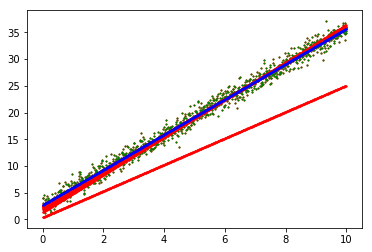

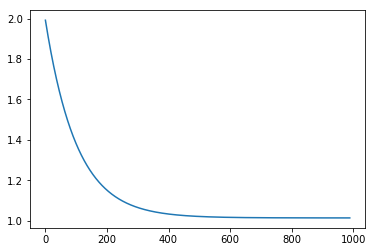

In [310]:
## 강사님 답
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

samples = 1000
data = np.array([1e-2*float(i) for i in range(samples)])
label = 3.3*data + 2.7 + np.random.randn(samples)
target = 3.3*data + 2.7

plt.scatter(data, label, 1, 'r')
plt.scatter(data, target, 1, 'b')

x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

w = tf.Variable(0, dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)

y = w*x + b

loss = tf.losses.mean_squared_error(y_, y)
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    loss_curve = []
    plt.scatter(data, label, 1, 'g')
    for i in range(1000):
        _, _loss, _w, _b = sess.run([train_op, loss, w, b], {x: data, y_: label})
        loss_curve.append(_loss)
        if i%100 == 0:
            _pred = sess.run(y, {x: data})## predicted 된 y = 빨강선
            plt.scatter(data, _pred, 1, 'r')
            print('step: {}, loss: {}, w: {}, b: {}'.format(i, _loss, _w, _b))
    
    plt.figure(0)
    plt.plot(loss_curve[10:])
    plt.figure(1)
    plt.scatter(data, target, 1, 'b')

In [311]:
with tf.Session() as sess:
    for i in range(1000):
        if i % 100 ==0:
            
            weights = []
            weights.append(_w)
            print(_w)

3.31589
3.31589
3.31589
3.31589
3.31589
3.31589
3.31589
3.31589
3.31589
3.31589
